In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

In [71]:
def display_line_plot(
    data: pd.Series,
    title: str = None,
):
    plt.figure(figsize=(20, 6))
    ax = sns.lineplot(data=data)

    ax.set_title(title, fontsize=20)
    
    # Set x-axis major ticks to weekly interval, on Mondays
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    # Format x-tick labels as 3-letter month name and day number
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    
    ax.axvline(pd.to_datetime('2020-11-27'), color='r', linestyle='--', lw=1.5)
#     ax.axvline(pd.to_datetime('2020-12-02'), color='r', linestyle='-.', lw=1.5)  # Recommender v3.0 vs Recommender v2.0
    ax.axvline(pd.to_datetime('2020-12-09'), color='r', linestyle='-', lw=1.5)  # 100% Recommender v3.0
    ax.axvline(pd.to_datetime('2021-03-25'), color='purple', linestyle='--', lw=1.5) # Recommender v3.0 vs Recommender v3.1
    
    ax.set_ylabel('')
    
    sns.despine()

# Clicks

In [38]:
clicks = pd.read_csv("csv_files/clicks_2020-10-01__2021-04-15.csv")
clicks.search_day = pd.to_datetime(clicks.search_day)
clicks = clicks[clicks.search_day > pd.to_datetime('2020-10-12')]

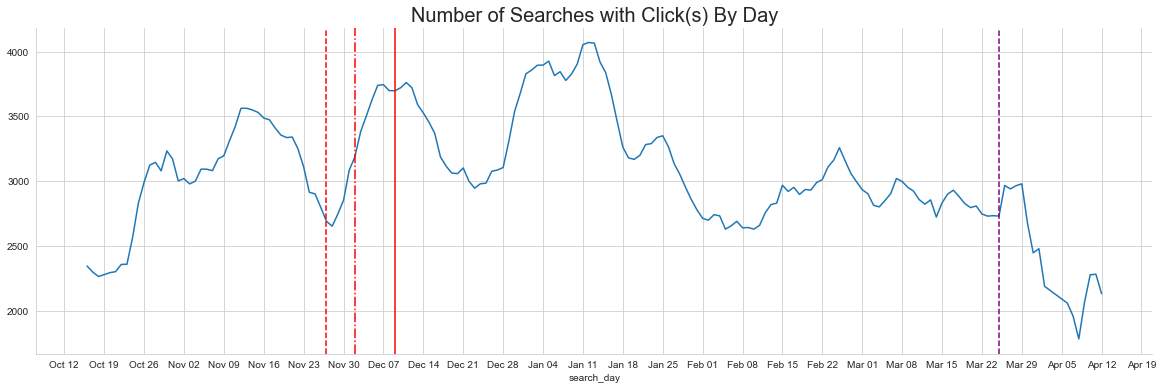

In [65]:
num_searches_with_clicks_by_day = clicks.groupby("search_day").size()
num_searches_with_clicks_by_day = num_searches_with_clicks_by_day.rolling(7, center=True).mean()
display_line_plot(num_searches_with_clicks_by_day, title="Number of Searches with Click(s) By Day")

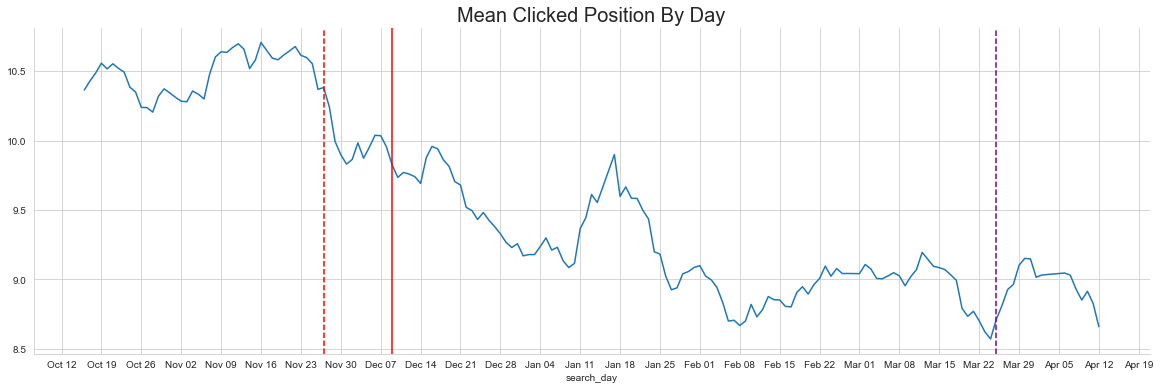

In [72]:
mean_click_positions_by_day = clicks.groupby("search_day").mean_click_positions.agg(np.mean)
mean_click_positions_by_day = mean_click_positions_by_day.rolling(7, center=True).mean()
display_line_plot(mean_click_positions_by_day, title="Mean Clicked Position By Day")

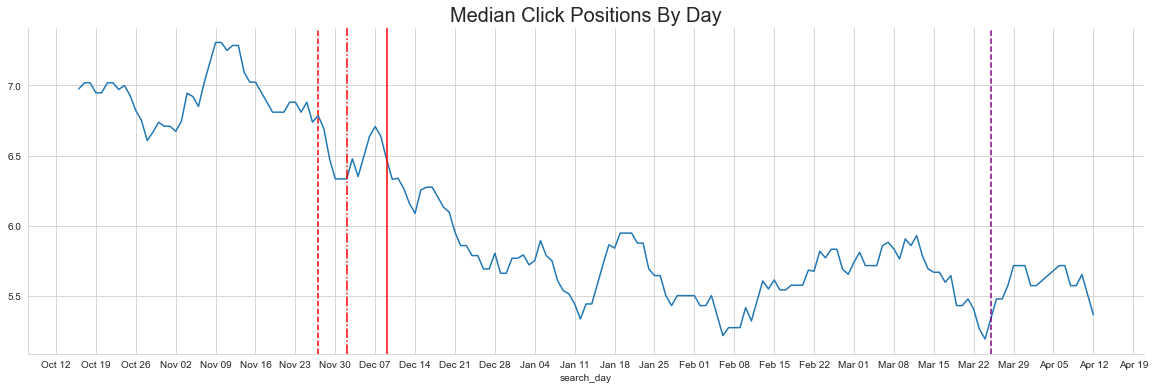

In [64]:
median_click_positions_by_day = clicks.groupby("search_day").mean_click_positions.agg(np.median)
median_click_positions_by_day = median_click_positions_by_day.rolling(7, center=True).mean()
display_line_plot(median_click_positions_by_day, title="Median Click Positions By Day")

# Bookings

In [66]:
bookings = pd.read_csv("csv_files/bookings_2020-10-01__2021-04-15.csv")
bookings.search_day = pd.to_datetime(bookings.search_day)

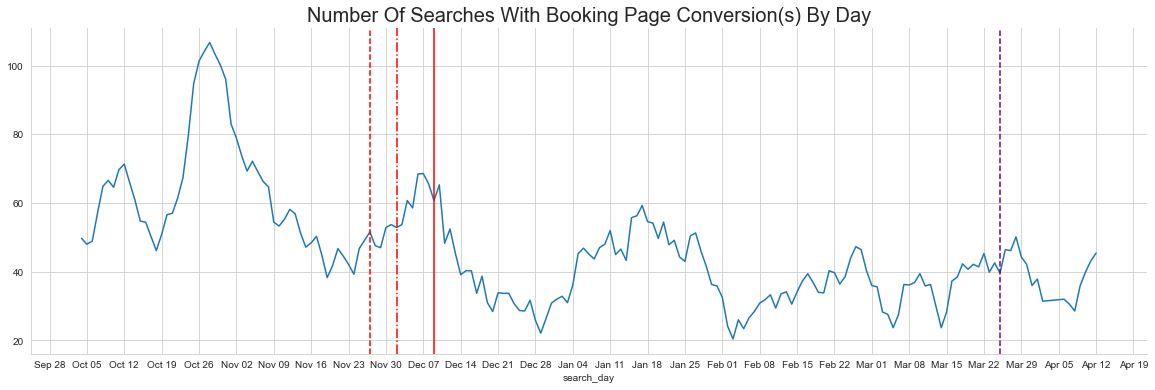

In [67]:
num_bookings_by_day = bookings.groupby("search_day").size()
num_bookings_by_day = num_bookings_by_day.rolling(7, center=True).mean()
display_line_plot(num_bookings_by_day, title="Number Of Searches With Booking Page Conversion(s) By Day")

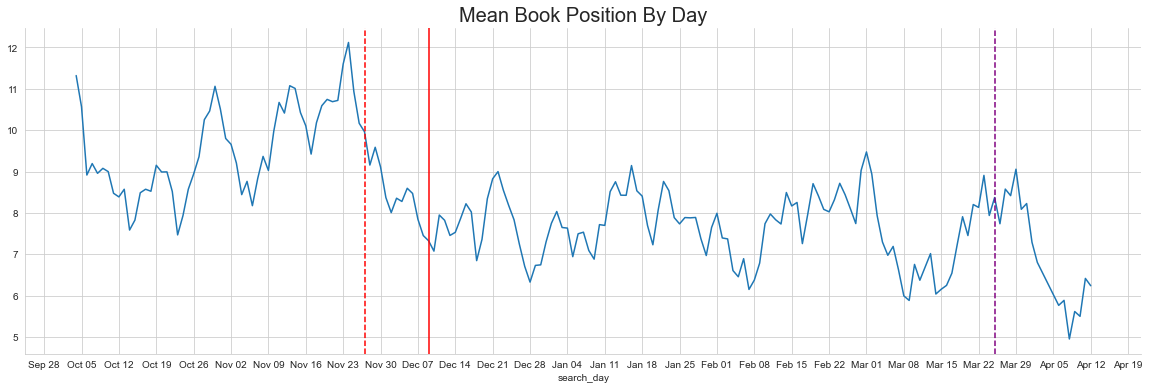

In [73]:
mean_book_positions_by_day = bookings.groupby("search_day").mean_book_positions.agg(np.mean)
mean_book_positions_by_day = mean_book_positions_by_day.rolling(7, center=True).mean()
display_line_plot(mean_book_positions_by_day, title="Mean Book Position By Day")

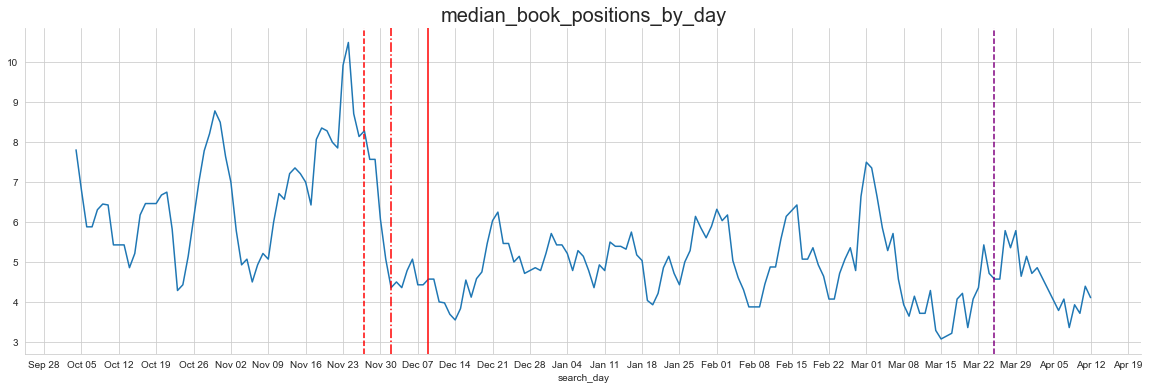

In [69]:
median_book_positions_by_day = bookings.groupby("search_day").mean_book_positions.agg(np.median)
median_book_positions_by_day = median_book_positions_by_day.rolling(7, center=True).mean()
display_line_plot(median_book_positions_by_day, title="median_book_positions_by_day")

# Ranking of Previously-Booked Listings

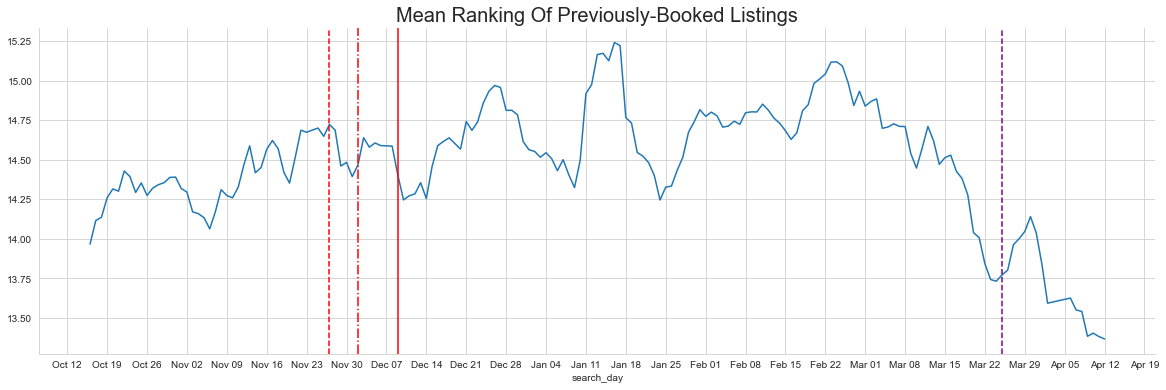

In [70]:
mean_ranking_of_booked_listings = clicks.groupby("search_day").mean_ranking_of_booked_listings.agg(np.mean)
mean_ranking_of_booked_listings = mean_ranking_of_booked_listings.rolling(7, center=True).mean()
display_line_plot(mean_ranking_of_booked_listings, title="Mean Ranking Of Previously-Booked Listings")